#**Búsqueda de Conjuntos de Datos:**
* Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
* Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

# Dataset

* [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance)

# **Análisis Exploratorio de Datos (EDA) Inicial:**
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
* Documentar los hallazgos de cada EDA en un notebook de Jupyter.

# EDA Dataset III

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

100%|██████████| 16.0k/16.0k [00:00<00:00, 16.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [2]:
import pandas as pd
# Ruta de archivo CSV
data = pd.read_csv(path + "/insurance.csv")
# Mostrar registros
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# hacer una copia del dato original
df = data.copy()
# Datos nulos
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [4]:
# Contar los valos unicos de df
df.nunique()

,0
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [5]:
# Mostrar DF
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Informacion de DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Columnas númericas y categoricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [8]:
# Convertir columnas categoricas a tipo 'category'
df[categorical_cols] = df[categorical_cols].astype('category')

In [9]:
# Contar datos duplicardos
df.duplicated().sum()

1

In [10]:
# Eliminar datos duplicados.
df = df.drop_duplicates()

In [11]:
# Valores unicos de columnas categoricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'sex':
['female', 'male']
Categories (2, object): ['female', 'male']

Valores únicos en la columna 'smoker':
['yes', 'no']
Categories (2, object): ['no', 'yes']

Valores únicos en la columna 'region':
['southwest', 'southeast', 'northwest', 'northeast']
Categories (4, object): ['northeast', 'northwest', 'southeast', 'southwest']



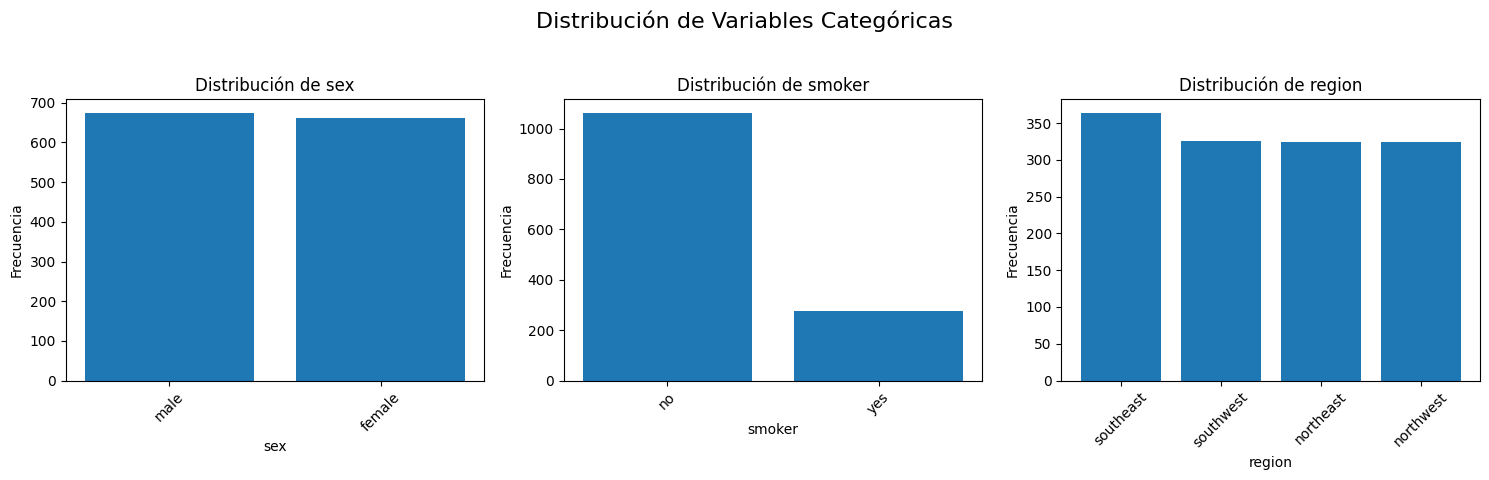

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Valores unicos de columnas categoricas
# Determinar el número de filas y columnas para los subplots
num_cols = 3  # Número de columnas en la cuadrícula de subplots
num_rows = (len(categorical_cols) + 1) // num_cols  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Distribución de Variables Categóricas", fontsize=16)

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis='x', rotation=45)

# Eliminar cualquier subplot vacío si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [13]:
# Contador de generos
df['sex'].value_counts()

,count
sex,
male,675
female,662


In [14]:
# Contador de genero y tipos de pago
df[['sex','region']].value_counts(ascending=True).to_dict()

{('male', 'northwest'): 160,
 ('female', 'northeast'): 161,
 ('female', 'southwest'): 162,
 ('male', 'northeast'): 163,
 ('male', 'southwest'): 163,
 ('female', 'northwest'): 164,
 ('female', 'southeast'): 175,
 ('male', 'southeast'): 189}

<ipython-input-15-2bfdcbac39cb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_region_counts = df.groupby(['sex', 'region']).size().reset_index(name='Counts')


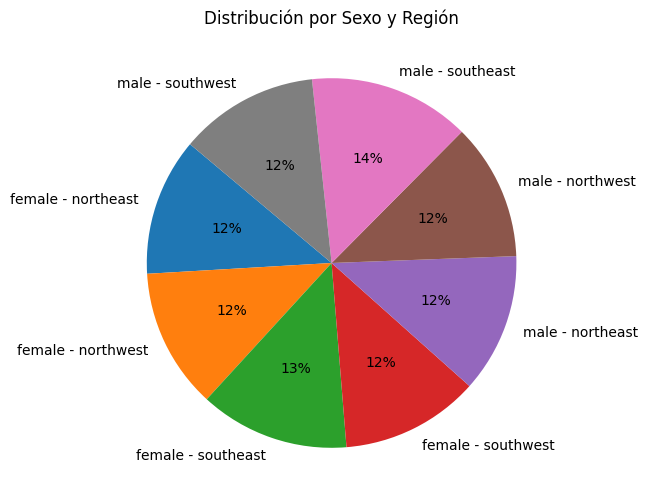

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar combinaciones de sexo y region
sex_region_counts = df.groupby(['sex', 'region']).size().reset_index(name='Counts')

# Preparar datos para el gráfico
labels = [f"{row['sex']} - {row['region']}" for _, row in sex_region_counts.iterrows()]
sizes = sex_region_counts['Counts']

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=140)
plt.title('Distribución por Sexo y Región')
plt.show()

In [16]:
# Descripcion de datos númericos
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


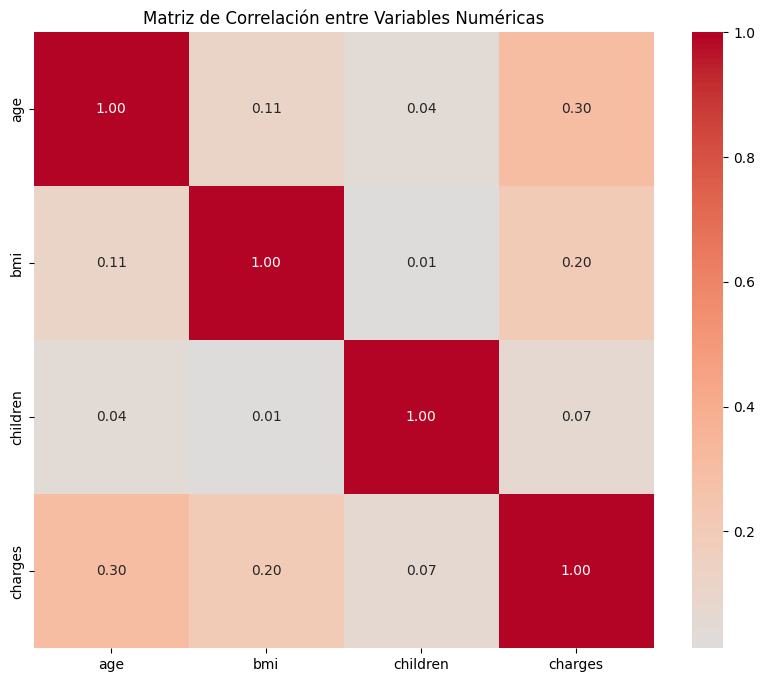

In [17]:
# Correlación de los datos numéricos
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [18]:
# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, numerical_cols)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 145
Porcentaje de outliers: 10.85%


In [19]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (1337, 7)
Tamaño del DataFrame sin outliers: (1192, 7)


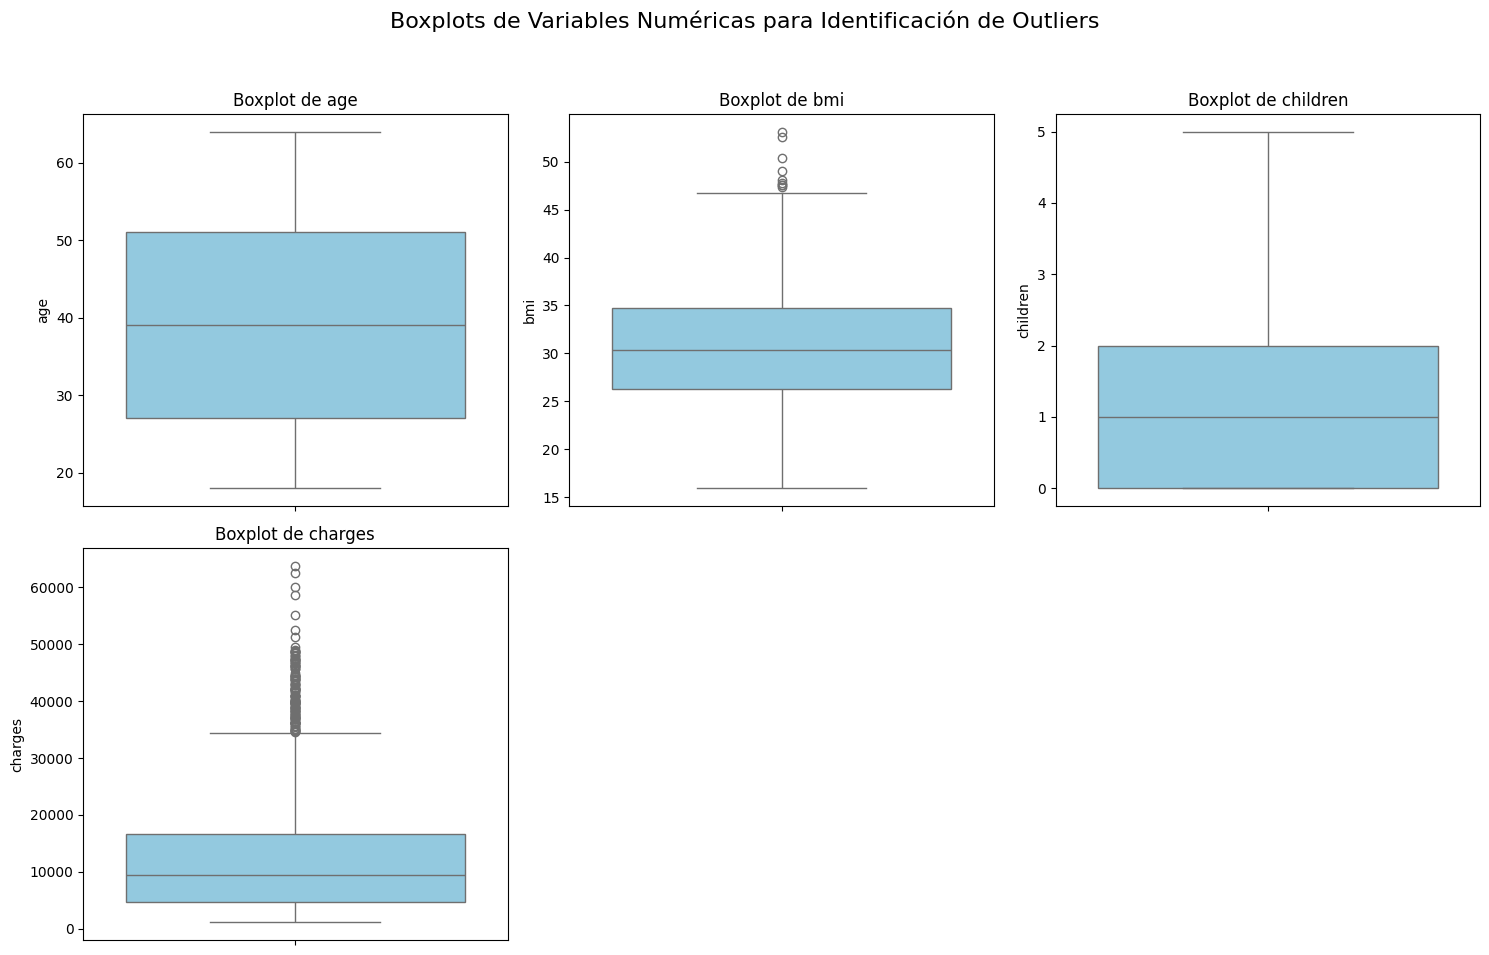

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir el tamaño del gráfico y la cuadrícula de subplots
num_cols = 3  # Número de columnas de subplots
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Boxplots de Variables Numéricas para Identificación de Outliers", fontsize=16)

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='skyblue')
    ax.set_title(f"Boxplot de {col}")

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el espaciado para el título principal
plt.show()

In [21]:
# Filtrar el DataFrame sin outliers
df = df.drop(index=outlier_indices)

In [22]:
# Información de los datos limpios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1192 non-null   int64   
 1   sex       1192 non-null   category
 2   bmi       1192 non-null   float64 
 3   children  1192 non-null   int64   
 4   smoker    1192 non-null   category
 5   region    1192 non-null   category
 6   charges   1192 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 50.5 KB


#**Diagnóstico y Selección de Problema:**
* Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
* Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
* Justificar la elección del problema y explicar por qué es relevante y desafiante.

# Dataset III

**Diagnóstico:**
* Este conjunto contiene información demográfica y médica de individuos (edad, género, IMC, historial de tabaquismo, entre otros) junto con el costo de sus seguros médicos.
* Desafíos: La variable objetivo (costo del seguro) tiene una alta variabilidad y puede estar influenciada por outliers, como gastos médicos extremos que pueden sesgar los resultados.

**Problema Seleccionado:**
* Regresión para predecir los gastos médicos personales.

**Justificación:**
* La predicción de costos médicos permite a las aseguradoras ajustar sus políticas de precios y detectar clientes de alto riesgo.
* Es un problema desafiante debido a la influencia de múltiples factores de salud y demográficos en el costo, así como la presencia de outliers significativos en los gastos médicos.